## SALARY PREDICTOR GROUP PROJECT

- Team members: Travis Ganaishlal, Julian Stark, and Jean-Claude Ndongo.
- Purpose of the study: explain the difference in salaries among people using a Kaggle dataset (https://www.kaggle.com/datasets/hekkta/salary-predictor) 
- The dataset contains 28 variables and 2005 observations

# Variables  

- Our analysis will determine the impact of the years of education, gender, levels of education, ability to influence others, sectors of employment, and levels of computer skills on monthly salary. 
- Y variable: Monthly salary (monthly_salary)
- X variables: years of education (yrs_qual), gender (sex), levels of education (highest_qual), ability to influence others (influencing), sectors of employment (sector), and levels of computer skills (computer_level).

# Files Retrieval and Summary Statistics

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

In [2]:
#Read the salary csv file
df = pd.read_csv('Resources/wage_predict.csv')
df.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333


Descriptive Statistics for Numerical Variables: 

In [3]:
#Descriptive statistics for the numerical variables of interest for our analysis
df[["monthly_salary","yrs_qual","highest_qual","influencing"]].describe(include="all")

,monthly_salary,yrs_qual,highest_qual,influencing
count,2005.000000,2005.000000,2005.000000,2005.000000
mean,4393.986833,13.877805,9.310723,3.316209
std,4679.512869,2.767168,3.059247,1.682291
min,34.666667,6.000000,1.000000,1.000000
25%,1859.000000,12.000000,7.000000,1.000000
50%,3253.466667,13.000000,9.000000,4.000000
75%,5458.333333,16.000000,12.000000,5.000000
max,68553.330000,21.000000,15.000000,5.000000


Measures of Central Tendency for Y variable, monthly salary:

In [4]:
#Calculate the measures of central tendency for the y variable, monthly salary
wages = df['monthly_salary']

mean_numpy = np.mean(wages)
print(f"The mean monthly salary for this dataset is {mean_numpy}")

median_numpy = np.median(wages)
print(f"The median monthly salary for this dataset is {median_numpy}")
      
mode_scipy = st.mode(wages)
print(f"The mode monthly salary for this dataset is {mode_scipy}")

The mean monthly salary for this dataset is 4393.986832763268
The median monthly salary for this dataset is 3253.4666667
The mode monthly salary for this dataset is ModeResult(mode=array([1733.3333333]), count=array([30]))


# Relationship between Experience and Wages

In [5]:
#pull variables for the columns needed
years = df["yrs_qual"]
wage = df["monthly_salary"]

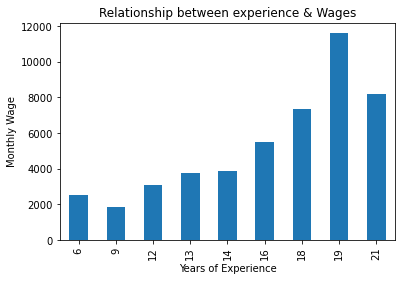

In [6]:
ch1= df.groupby(years).mean()["monthly_salary"]
charts=ch1.plot(kind="bar")
charts.set_ylabel('Monthly Wage')
charts.set_xlabel('Years of Experience')
charts.set_title('Relationship between experience & Wages');

- Conclusion: Wages tend to increase with work experience but drop after approximately 19 years of experience.

# Relationship between Computer Skills and Wages

In [7]:
# #pull variable for years worked and monthly wage
comp = df["computer_level"]
wage = df["monthly_salary"]

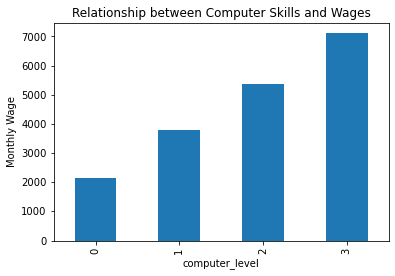

In [8]:
chart_three=df.groupby(comp).mean()["monthly_salary"]
chart=chart_three.plot(kind="bar")
chart.set_ylabel("Monthly Wage")
chart.set_title("Relationship between Computer Skills and Wages");

- Conclusion: Wages tend to increase with an increase in computer proficiency.

# Wages by Gender

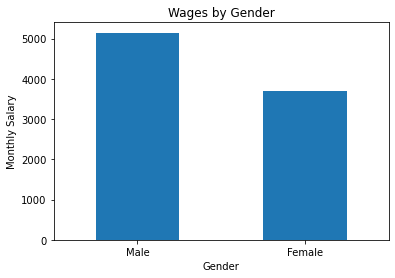

In [9]:
#Determine the relationship between gender and monthly salary
gender_df = df.groupby('sex').mean().monthly_salary.plot(kind="bar")
plt.xlabel('Gender')
plt.ylabel('Monthly Salary')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation=360)
plt.title('Wages by Gender');

 - Conclusion of the analysis of wages by gender:Our analysis indicates that, of all individuals surveyed in this study, men earned more than women.

# Wages by Sector of Employment

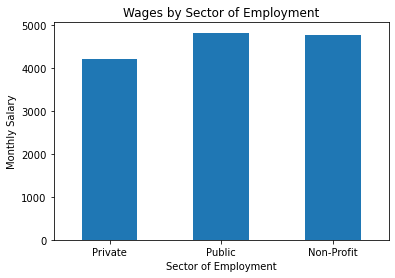

In [10]:
#Determine the relationship between the sector of employment and monthly salary
sector_df = df.groupby('sector').mean().monthly_salary.plot(kind="bar")
plt.xlabel('Sector of Employment')
plt.ylabel('Monthly Salary')
plt.xticks(np.arange(3), ['Private', 'Public', 'Non-Profit'], rotation=360)
plt.title('Wages by Sector of Employment');

- Conclusion of the analysis of wages by sector of employment: the public sector is the highest paying sector, followed by non-profit, then the private sector. 

# Correlation Between Education Levels and Salary

In [11]:
#Correlation between education level and salary 
corr = df['highest_qual'].corr(df['monthly_salary'])
print("Correlation between education level and salary: {:.2f}".format(corr))

Correlation between education level and salary: 0.34


In [12]:
# One-way ANOVA to test for significant differences in earnings between degree types
degree_type = df.groupby('highest_qual')['monthly_salary'].apply(list)
f_stat, p_val = st.f_oneway(*degree_type.values)
if p_val < 0.05:
    print("There is a significant difference in earnings between degree types (p-value = {:.4f})".format(p_val))
else:
    print("There is no significant difference in earnings between degree types (p-value = {:.4f})".format(p_val))

There is a significant difference in earnings between degree types (p-value = 0.0000)


Scatterplot of education level and salary

Box plot of earnings by degree type

C:\Users\mjndo\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


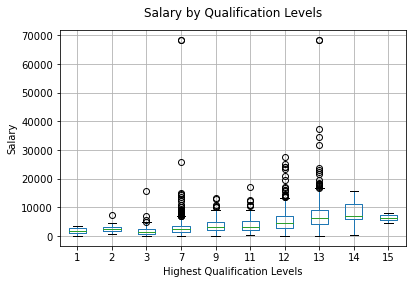

In [13]:
# Box plot of earnings by levels of qualification
qual_df = df.boxplot(column='monthly_salary', by='highest_qual')
plt.ylabel('Salary')
plt.xlabel('Highest Qualification Levels')
plt.title("")
plt.suptitle("Salary by Qualification Levels")
plt.show();

# Analysis of Influencing on Salary

In [14]:
# # Regression analysis of influencing on salary
X = sm.add_constant(df['influencing'])
model = sm.OLS(df['monthly_salary'], X)
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         monthly_salary   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     42.32
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           9.75e-11
Time:                        20:04:00   Log-Likelihood:                -19768.
No. Observations:                2005   AIC:                         3.954e+04
Df Residuals:                    2003   BIC:                         3.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3067.0649    228.700     13.411      

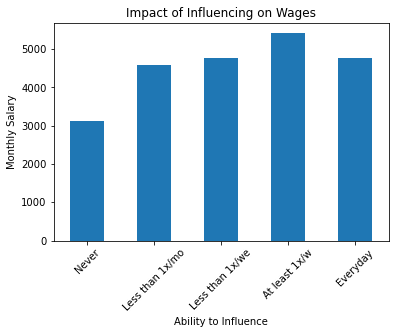

In [15]:
# Scatter plot with regression line
Influencing_df = df.groupby('influencing').mean().monthly_salary.plot(kind="bar")
plt.xlabel('Ability to Influence')
plt.ylabel('Monthly Salary')
plt.xticks(np.arange(5), ['Never', 'Less than 1x/mo', 'Less than 1x/we', 'At least 1x/w', 'Everyday'], rotation=45)
plt.title('Impact of Influencing on Wages');